In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Before creating and executing the model let's check the version of directories.
import tensorflow
import keras
tensorflow.__version__, keras.__version__

('2.3.0', '2.4.3')

In [3]:
#  re-size all the images to this
IMAGE_SIZE = [224,224]

In [4]:
tarin_path = 'Malaria_Detection_Dataset/Train'
test_path = 'Malaria_Detection_Dataset/Test'

In [5]:
# Import the Vgg16 Library as shown below and add preprocessing layer to the frequency
# Here we will be using imagenet weights
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob('Malaria_Detection_Dataset/Train/*')

In [8]:
# Our Flatten layers: User can add more if they want to add
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# Creating a initialized model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
from tensorflow.keras.layers import MaxPooling2D

### Create Model from scratch using Deep Learning CNN Model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [10]:
# Applying the loss function and optimizer to the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Malaria_Detection_Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Malaria_Detection_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [12]:
# Fitting the model on to the sampled dataset
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 15s 1s/step - loss: 1.9307 - accuracy: 0.5697 - val_loss: 0.6958 - val_accuracy: 0.6716
Epoch 2/50
13/13 [==============================] - 15s 1s/step - loss: 0.6889 - accuracy: 0.5841 - val_loss: 0.7188 - val_accuracy: 0.4851
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.5575 - accuracy: 0.7380 - val_loss: 0.8941 - val_accuracy: 0.4254
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.5453 - accuracy: 0.6851 - val_loss: 0.8689 - val_accuracy: 0.3657
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.4793 - accuracy: 0.7572 - val_loss: 0.8402 - val_accuracy: 0.4179
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.4177 - accuracy: 0.8173 - val_loss: 0.7780 - val_accuracy: 0.4254
Epoch 7/50
13/13 [==============================] - 16s 1s/step - loss: 0.3584 - acc

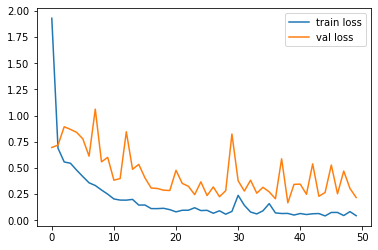

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

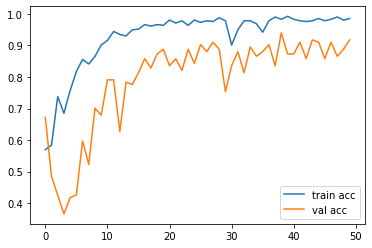

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred

array([[9.99794543e-01, 2.05507924e-04],
       [1.00000000e+00, 4.89639718e-10],
       [1.41955893e-02, 9.85804439e-01],
       [9.99999881e-01, 1.21948460e-07],
       [1.00000000e+00, 1.95924184e-08],
       [1.00000000e+00, 3.54476787e-37],
       [1.00000000e+00, 1.58802460e-36],
       [9.99999881e-01, 1.17606639e-07],
       [1.00000000e+00, 8.80709344e-20],
       [9.99999642e-01, 3.35252849e-07],
       [1.00000000e+00, 1.16620731e-08],
       [1.00000000e+00, 2.31551914e-15],
       [1.00000000e+00, 3.06101912e-22],
       [1.35145290e-02, 9.86485481e-01],
       [1.53967189e-02, 9.84603226e-01],
       [1.00000000e+00, 5.31840172e-08],
       [3.00215669e-02, 9.69978392e-01],
       [1.00000000e+00, 1.60051072e-09],
       [9.99910235e-01, 8.97914360e-05],
       [8.86890531e-01, 1.13109492e-01],
       [3.42026763e-02, 9.65797246e-01],
       [1.09598348e-02, 9.89040136e-01],
       [9.99987960e-01, 1.20634722e-05],
       [1.00000000e+00, 1.89750299e-12],
       [2.829786

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [20]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('model_vgg19.h5')

In [22]:
img=image.load_img('Malaria_Detection_Dataset/Test/Uninfected/MDTestU (12).png',target_size=(224,224))
x=image.img_to_array(img)
x
x.shape

(224, 224, 3)

In [23]:
# Reshape and preprocess the extracted values of the image
x = x/255
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
# Predicting the states of the test image
model.predict(img_data)
a = np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Symptoms of Uninfected Conditions")
else:
    print("Symptoms of Infected Conditions")

Symptoms of Uninfected Conditions
